                                                                                   Breast cancer 

          Is one of the most common types of cancer and most importantly, the deadliest cancer for women. Early detection is crucial to increase the chance of survival of a breast cancer patient, as it helps to provide clinical treatment to the patient. According to American Society (ACS), most of the breast lumps are non-cancerous or it can be called as benign. On the other hand, the one that is cancerous is called malignant. Hence in this post, we will build several models to predict two classes of tumors; benign and malignant.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

from IPython.display import Image
Image(url = 'https://miro.medium.com/v2/resize:fit:786/format:webp/1*pxFCmhRFTighUn88baLcSA.png', width = 2000, height = 700)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Lets understand Exactly what is the problem, and the Features We are having in  our DataSet 

### Attribute Information:

    1) ID number
    2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus (3–32):

        a) radius (mean of distances from the center to points on the perimeter)

        b) texture (standard deviation of gray-scale values)

        c) perimeter

        d) area

        e) smoothness (local variation in radius lengths)

        f) compactness (perimeter² / area — 1.0)

        g) concavity (severity of concave portions of the contour)

        h) concave points (number of concave portions of the contour)

        i) symmetry

        j) fractal dimension (“coastline approximation” — 1)

Note : The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius

In [4]:
data.shape

(569, 33)

In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# checking if there are any null Values in Our dataframe 

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
                          ... 
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
Length: 33, dtype: int64

In [8]:
def print_null_info (df):
    missingvaluesper = []
    missingvaluescount = []
    fets_names = []
    for col in df.columns:
        null_percentage = df[col].isnull().sum() / len(df) * 100
        feature_name = col
        missingvaluesper.append(null_percentage)
        fets_names.append(feature_name)
        missingvaluescount.append(df[col].isnull().sum())
    return pd.concat([pd.Series(fets_names, name = 'Feature'),pd.Series(missingvaluesper, name = 'Null Percentage'), pd.Series(missingvaluescount, name = 'Null Count')], axis = 1)

In [9]:
print_null_info(df)

,Feature,Null Percentage,Null Count
0,id,0.0,0
1,diagnosis,0.0,0
2,radius_mean,0.0,0
3,texture_mean,0.0,0
4,perimeter_mean,0.0,0
...,...,...,...
28,concavity_worst,0.0,0
29,concave points_worst,0.0,0
30,symmetry_worst,0.0,0
31,fractal_dimension_worst,0.0,0


In [10]:
print_null_info(df).nlargest(3, 'Null Percentage')

,Feature,Null Percentage,Null Count
32,Unnamed: 32,100.0,569
0,id,0.0,0
1,diagnosis,0.0,0


Seems like we are in a good condition, as we are having only a sinlge columns which contains 100% null values. >> For that it should be dropped

The Rest of the Columns as we can see are having 0% Null percentage

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### we dont Need the ID column as well as the unnamed:32 column >> they have to be Dropped

In [13]:
df.drop(['Unnamed: 32', 'id'], axis = 1, inplace= True)

In [14]:
target = df['diagnosis']

## Data Exploration

B    357
M    212
Name: diagnosis, dtype: int64

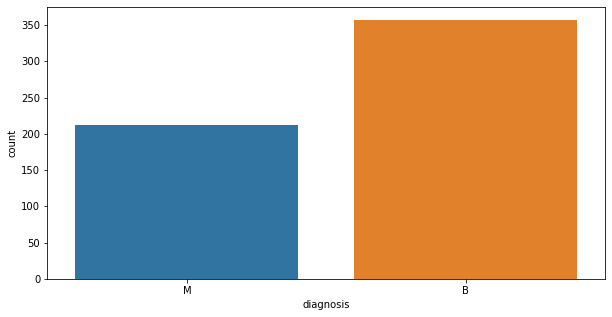

In [15]:
fix, ax = plt.subplots(figsize = (10,5))
sns.countplot(df['diagnosis'])
df['diagnosis'].value_counts()

In [16]:
mean_fets = []
for col in list(df.columns):
    if 'mean' in col:
        mean_fets.append(col)
print(mean_fets)
df[mean_fets].describe()

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [17]:
se_fets = []
for col in list(df.columns):
    if 'se' in col:
        se_fets.append(col)
print(se_fets)
df[se_fets].describe()

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']


,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


In [18]:
worst_fets = []
for col in list(df.columns):
    if 'worst' in col :
        worst_fets.append(col)
print(worst_fets)
df[worst_fets].describe()

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
import scipy.stats as scipy

def t_test (df , cols) :
    group_m = df.loc[df['diagnosis'] == 'M']
    group_b = df.loc[df['diagnosis'] == 'B']

    for col in df[cols].columns:
        t_statistics , p_value = scipy.ttest_ind(group_m[col], group_b[col])
        print(col, '------', t_statistics, p_value)


def box_plot(df, fets):
    no_of_rows = 5
    no_of_cols = 2
    fet_nu = 0
    fig, ax = plt.subplots(no_of_rows, no_of_cols, figsize = (15,20))
    for row in range (no_of_rows):
        for col in range(no_of_cols):
            sns.boxplot(x = df['diagnosis'], y = df[fets[fet_nu]], ax= ax[row][col])
            fet_nu += 1


### MEAN FEATURES

radius_mean ------ 25.435821610057054 8.465940572262422e-96
texture_mean ------ 10.86720108146434 4.0586360478980736e-25
perimeter_mean ------ 26.405212979192665 8.43625103617473e-101
area_mean ------ 23.938687235690992 4.734564310307344e-88
smoothness_mean ------ 9.146098808149038 1.0518503592032013e-18
compactness_mean ------ 17.69839197688993 3.9382631058873895e-56
concavity_mean ------ 23.103963430622642 9.966555755072963e-84
concave points_mean ------ 29.354318592113618 7.101150161057422e-116
symmetry_mean ------ 8.338311789592808 5.733384028466827e-16
fractal_dimension_mean ------ -0.30571112978583087 0.7599368037256238


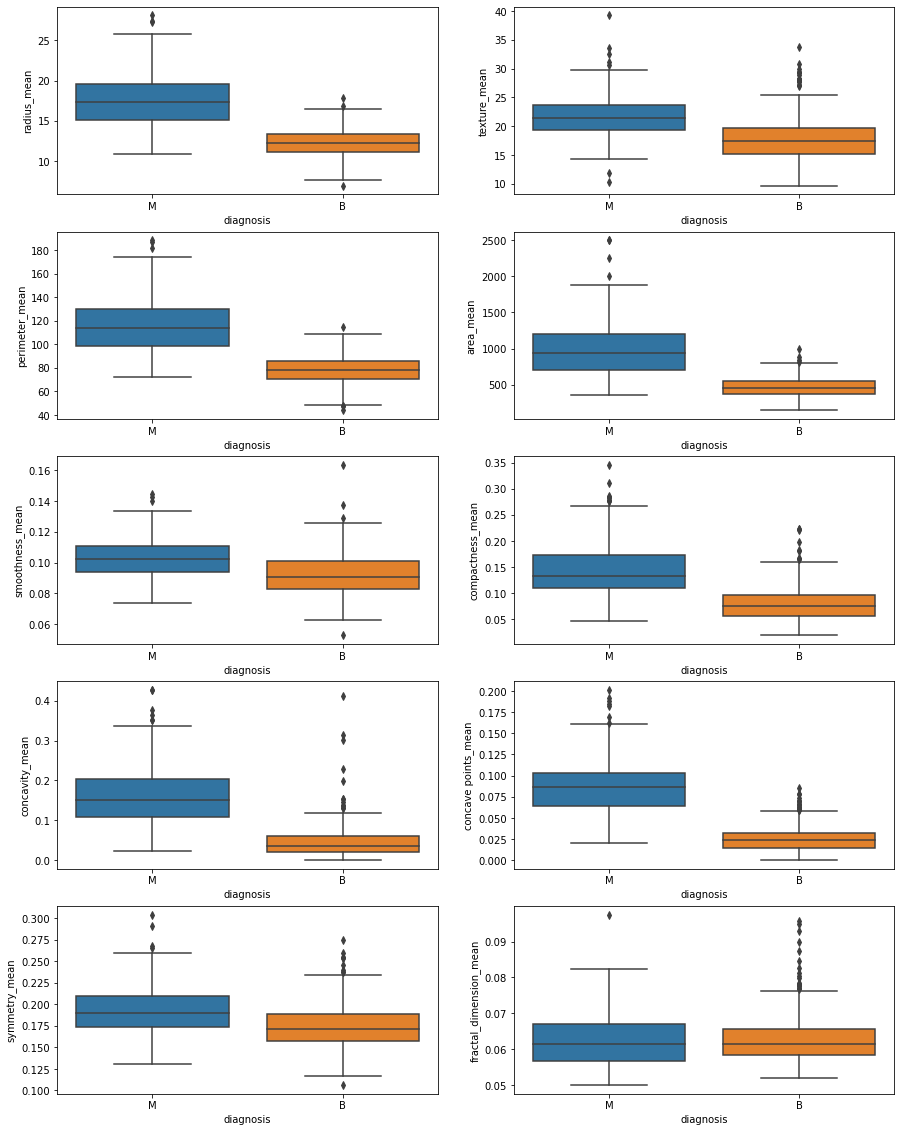

In [20]:
box_plot(df, mean_fets)
t_test(df, mean_fets)

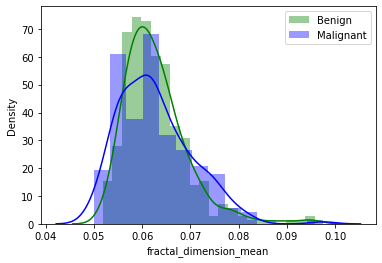

In [21]:
sns.distplot(df[df['diagnosis'] == 'B']['fractal_dimension_mean'], color="g", kde = True, label = 'Benign')
sns.distplot(df[df['diagnosis'] == 'M']['fractal_dimension_mean'], color="b", kde = True, label = 'Malignant')
plt.legend()

if we look at the fractal_dimension_mean we will understand that the value of this feature for all the categories ('Benign', 'Malignant') is nearly the same, in other words there's no difference in the distribution of fractal_dimension_mean for malignant and benign ... Take a look 

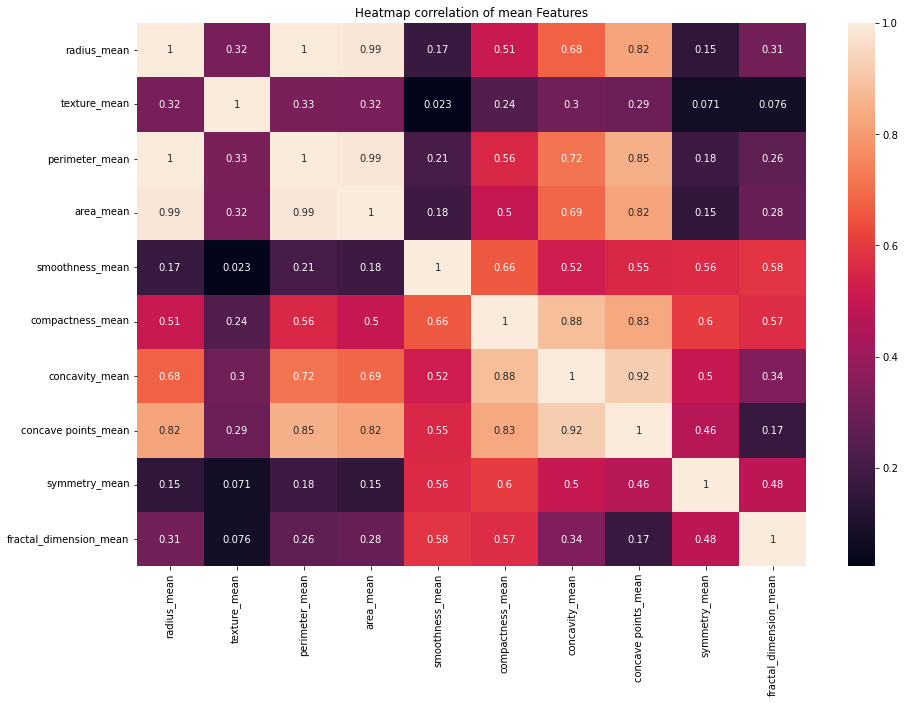

In [22]:
corr_mean = df[mean_fets].corr().abs()
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corr_mean, annot= True)
plt.title('Heatmap correlation of mean Features')
plt.show()

From this Heatmap,  we can understand that : 
- area mean, perimeter mean, and radius mean are highly correlated to each others. > 0.99 
- concavity mean and concave points mean are also correlated  to each others. > 0.92


### STANDARD ERROR FEATURES

radius_se ------ 16.39635102598575 9.73894865646109e-50
texture_se ------ -0.1977238031013334 0.8433320287670163
perimeter_se ------ 15.934158019257902 1.6519051758498057e-47
area_se ------ 15.609342900255001 5.8955213926058635e-46
smoothness_se ------ -1.599364812413284 0.11029660865789295
compactness_se ------ 7.297077437448529 9.975994654074766e-13
concavity_se ------ 6.246157343266935 8.260176167970112e-10
concave points_se ------ 10.64249782452053 3.0723087688180654e-24
symmetry_se ------ -0.1552978000059369 0.8766418183858812
fractal_dimension_se ------ 1.862330463973157 0.06307355082239346


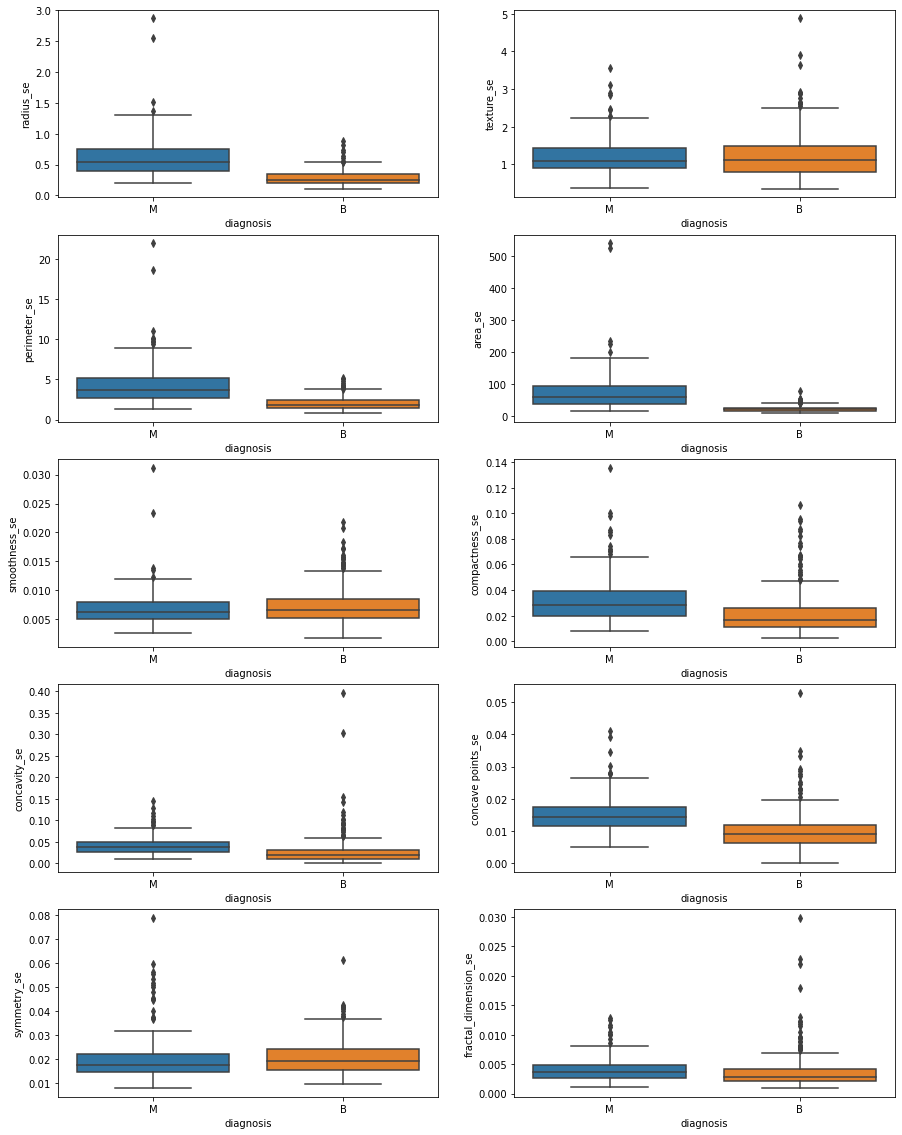

In [23]:
box_plot(df, se_fets)
t_test(df, se_fets)

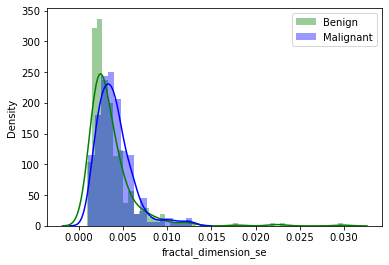

In [24]:
sns.distplot(df[df['diagnosis'] == 'B']['fractal_dimension_se'], color="g", kde = True, label = 'Benign')
sns.distplot(df[df['diagnosis'] == 'M']['fractal_dimension_se'], color="b", kde = True, label = 'Malignant')
plt.legend()

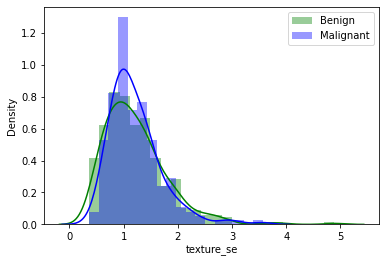

In [25]:
sns.distplot(df[df['diagnosis'] == 'B']['texture_se'], color="g", kde = True, label = 'Benign')
sns.distplot(df[df['diagnosis'] == 'M']['texture_se'], color="b", kde = True, label = 'Malignant')
plt.legend()

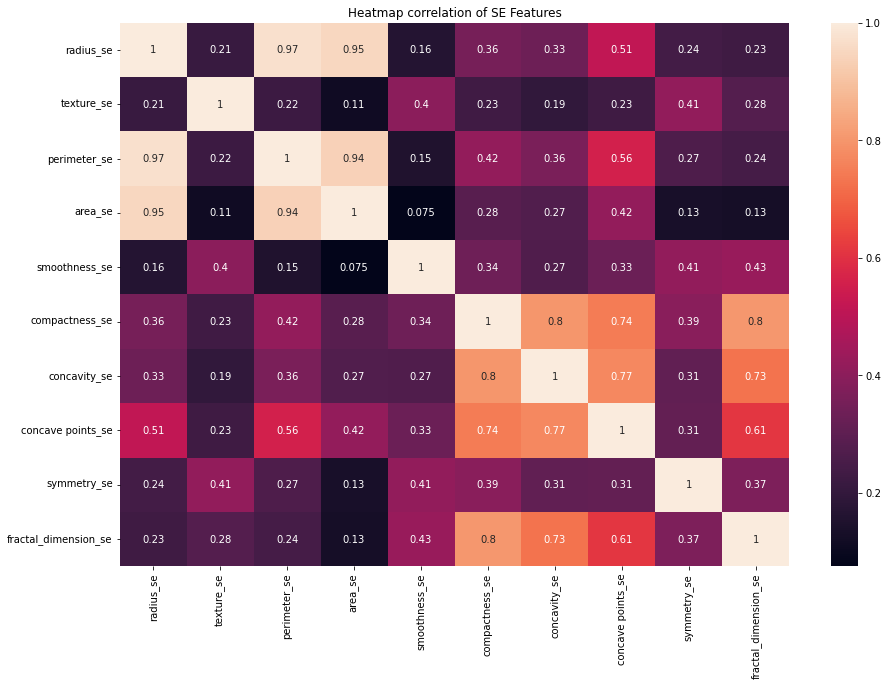

In [26]:
corr_se = df[se_fets].corr().abs()
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corr_se, annot= True)
plt.title('Heatmap correlation of SE Features')
plt.show()

### WORST FEATURES

radius_worst ------ 29.33908156342075 8.482291921684414e-116
texture_worst ------ 12.23098134599393 1.0780574879494241e-30
perimeter_worst ------ 29.965717392710303 5.771397139668621e-119
area_worst ------ 25.721590260589004 2.828847704286693e-97
smoothness_worst ------ 11.066746606769504 6.575143633984769e-26
compactness_worst ------ 17.445373681975457 7.069816352538377e-55
concavity_worst ------ 20.897175392934138 2.4646639567829224e-72
concave points_worst ------ 31.054555115984236 1.9690997072164375e-124
symmetry_worst ------ 10.902303982929364 2.951120577154039e-25
fractal_dimension_worst ------ 8.151316497940705 2.316432449982829e-15


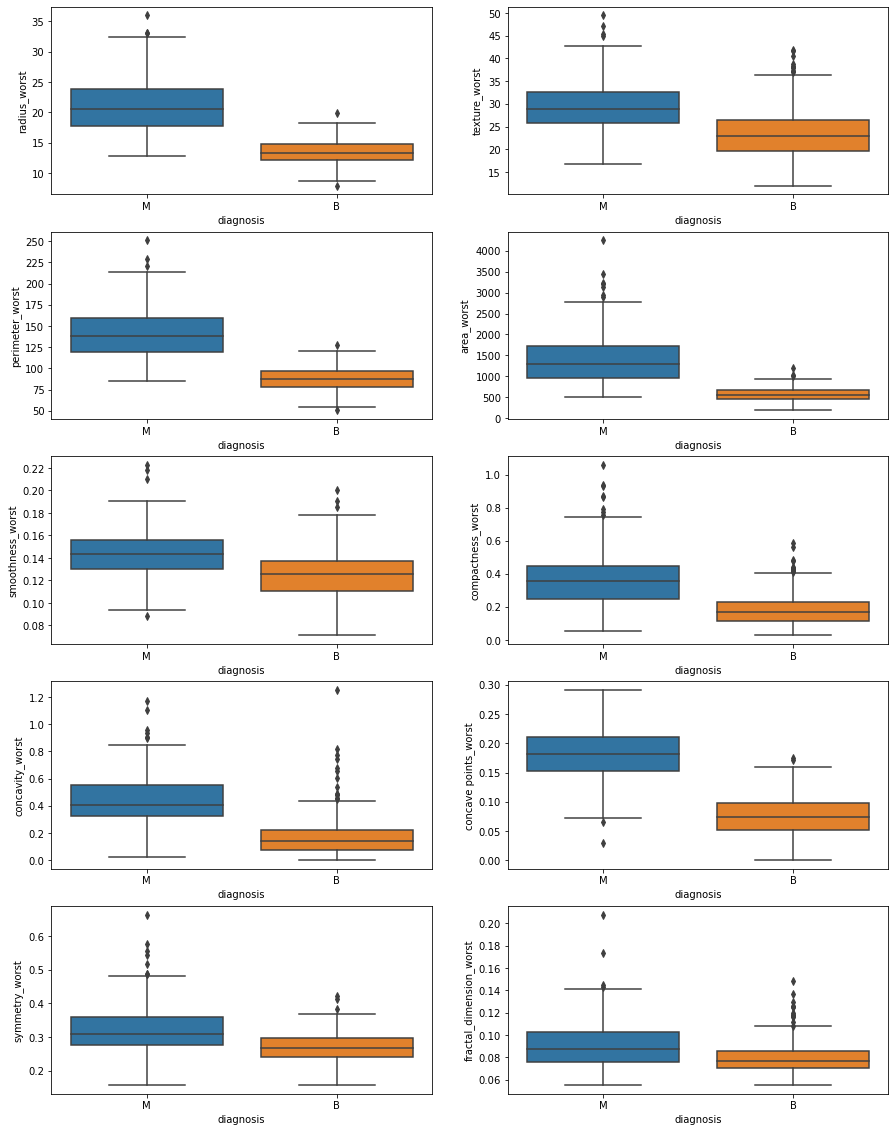

In [27]:

box_plot(df, worst_fets)
t_test(df, worst_fets)

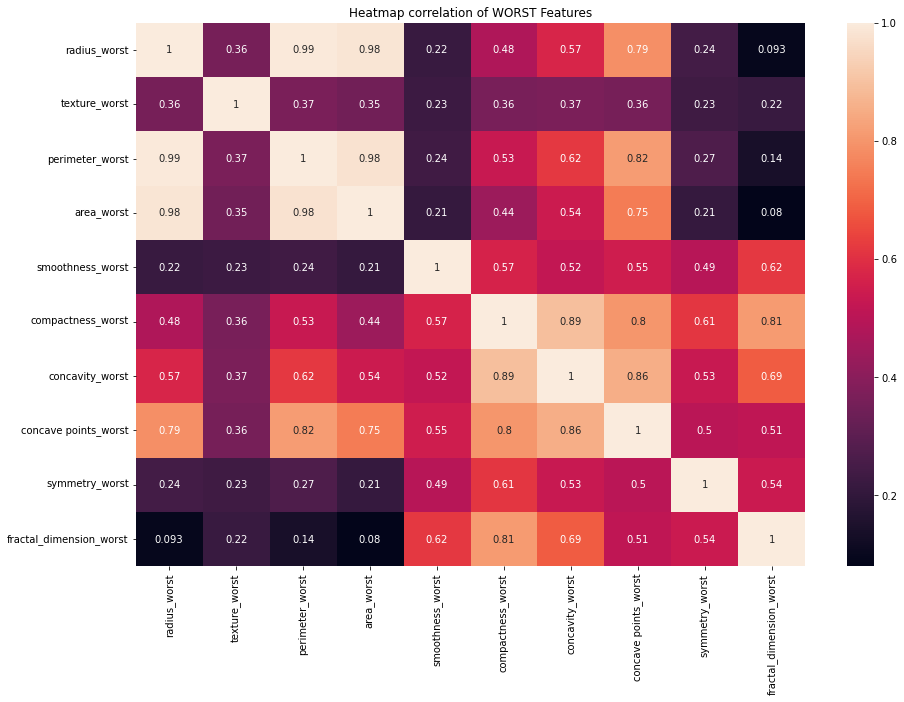

In [28]:
corr_worst = df[worst_fets].corr().abs()
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corr_worst, annot= True)
plt.title('Heatmap correlation of WORST Features')
plt.show()

## Check For Duplicates : 

In [29]:
df.duplicated().sum()

0

No Duplication in the data set

### Building The Model (Before Dropping Features)

In [30]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [31]:
predictors = df.drop('diagnosis', axis = 1)
target = df['diagnosis'].map({'B' : 0 , 'M' : 1})

In [32]:
predictors

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
target.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [37]:
# splitting The Data : 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size= 0.3, random_state= 102)

Models To Used : 

- Logistic Regression 
- KNN Classifier 
- Naive Bayes 
- Decision Tree Classifier 
- Decision Tree Classifier 

 ## Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

scores = cross_val_score(log_reg, cv = 5, X= predictors, y= target)
print(scores)
print(scores.mean())

[0.92982456 0.93859649 0.96491228 0.94736842 0.95575221]
0.947290793355069


In [39]:
y_predict = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_predict)
test_accuracy

0.9649122807017544

## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

scores = cross_val_score(randomforest, cv = 5, X= X_train, y= y_train)

y_predict = randomforest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_predict)
test_accuracy

0.9590643274853801

## Descision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

scores = cross_val_score(randomforest, cv = 5, X= X_train, y= y_train)

y_predict = decision_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_predict)
test_accuracy

0.9415204678362573

## GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

logisitic regression

In [49]:
log_reg = LogisticRegression()
parameters = {'penalty' : ['l1','l2','elasticnet'],
'C'  : [1,2 ,3],
'fit_intercept' : [True, False]}
log_reg_grid = GridSearchCV(log_reg, param_grid= parameters, cv = 5)

In [50]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [51]:
log_reg_grid.best_params_

{'C': 1, 'fit_intercept': False, 'penalty': 'l2'}

In [52]:
log_reg_grid.best_score_

0.9422468354430379

In [54]:
predictions = log_reg_grid.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, predictions)


0.9649122807017544

In [59]:
confusion_matrix(y_true = y_test, y_pred = predictions)

array([[109,   3],
       [  3,  56]])

In [60]:
classification_report(y_true = y_test, y_pred = predictions)

'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97       112\n           1       0.95      0.95      0.95        59\n\n    accuracy                           0.96       171\n   macro avg       0.96      0.96      0.96       171\nweighted avg       0.96      0.96      0.96       171\n'

 - We can see that our model worked well on training with a score of 94 % , and the model got evaluated very well on testing set that the model haven't seen before and scored 96 % . 
 - We can still modify the features (As some columns are correlated to each others , and other columns have no direct effect on the target variable). 

Deployment : 
https://medium.com/swlh/deploying-breast-cancer-prediction-model-using-flask-apis-and-heroku-4fd3b65b2f26